## Her kan vi visualisere dataen samlet med seaborn og matplotlib

Først kan vi lage en lett visualisering av en av elementene i luftdataen, f eks NO2 over tid. Her har vi laget en graf fra April til slutten av Mai (ca 2 måneder). 

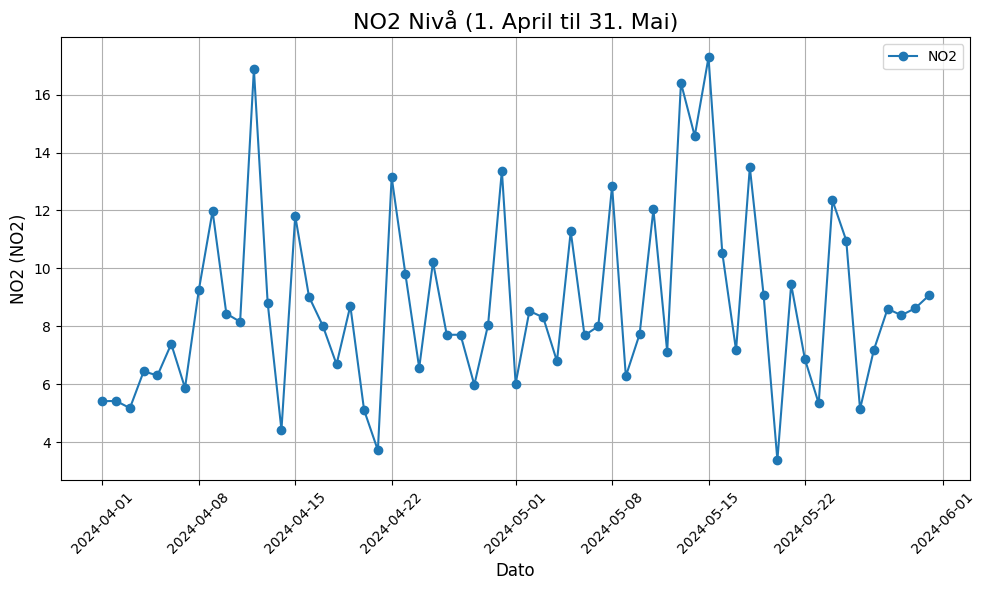

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

Luftdata = pd.read_json('../data/df1_data.json')

# bruker pivot_df filtrerer for dato område
Luftdata["date"] = pd.to_datetime(Luftdata["date"]) 
filtered_df = Luftdata[(Luftdata["date"] >= "2024-04-01") & (Luftdata["date"] <= "2024-05-31")]


# Velger variabel
variable = "NO2"

# Plotter
plt.figure(figsize=(10, 6))
plt.plot(filtered_df["date"], filtered_df[variable], marker="o", label=variable)

# Pynter og justerer grafen
plt.title(f"{variable} Nivå (1. April til 31. Mai)", fontsize=16)
plt.xlabel("Dato", fontsize=12)
plt.ylabel(f"{variable} ({Luftdata[variable].name})", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()


plt.tight_layout()
plt.show()


For å se utviklingen av ett element over tid er det lettest å bruke en slik graf, uten å komplisere det mer. Om vi ønsker å vise utviklingen over lengre tid, som for eksempel over hele årstiden vi har data tilgjengelig for, må vi vurdere å ta et løpende gjennomsnitt. Siden elementer kan variere sterkt fra dag til dag, vil en graf over flere måneder bli veldig klussete, og for å se trender over flere dager er det nyttig å tilføre en trendlinje som viser gjennomsnittet over 3 dager. 


I neste eksempel viser vi utviklingen fra begynnelsen av April til slutten av Juli, med en trendlinje som viser gjennomsnittet for 3 dager. 

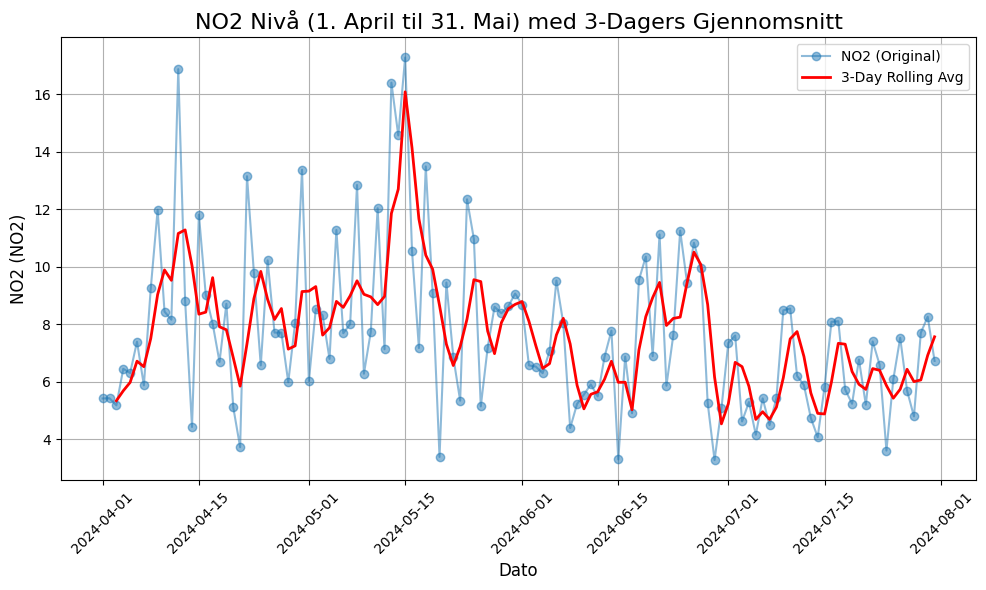

In [3]:

filtered_df = Luftdata[(Luftdata["date"] >= "2024-04-01") & (Luftdata["date"] <= "2024-07-31")].copy()

variable = "NO2"

# Velger 3 dagers gjennomsnitt
avg_periode= 3
filtered_df.loc[:,f"{variable}_avg_periode"] = filtered_df[variable].rolling(window=avg_periode).mean()

# Opprinnelig data
plt.figure(figsize=(10, 6))
plt.plot(filtered_df["date"], filtered_df[variable], marker="o", label=f"{variable} (Original)", alpha=0.5)

# Plotter 3 dagers gjennomsnitt
plt.plot(filtered_df["date"], filtered_df[f"{variable}_avg_periode"], color="red", label=f"{avg_periode}-Day Rolling Avg", linewidth=2)

# Pynter og justerer
plt.title(f"{variable} Nivå (1. April til 31. Mai) med {avg_periode}-Dagers Gjennomsnitt", fontsize=16)
plt.xlabel("Dato", fontsize=12)
plt.ylabel(f"{variable} ({Luftdata[variable].name})", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

Som vi ser i grafen over er det lettere å se trender over flere dager om man har gjennomsnittslinje. Videre kan vi utforske måter å legge til mer data, for eksempel ved å bruke alle årene tilgjengelig. En måte å gjøre det på er å lime gjennomsnittslinjene over hverandre. I neste visualisering legger vi alle grafene for alle årene oppå hverandre: 

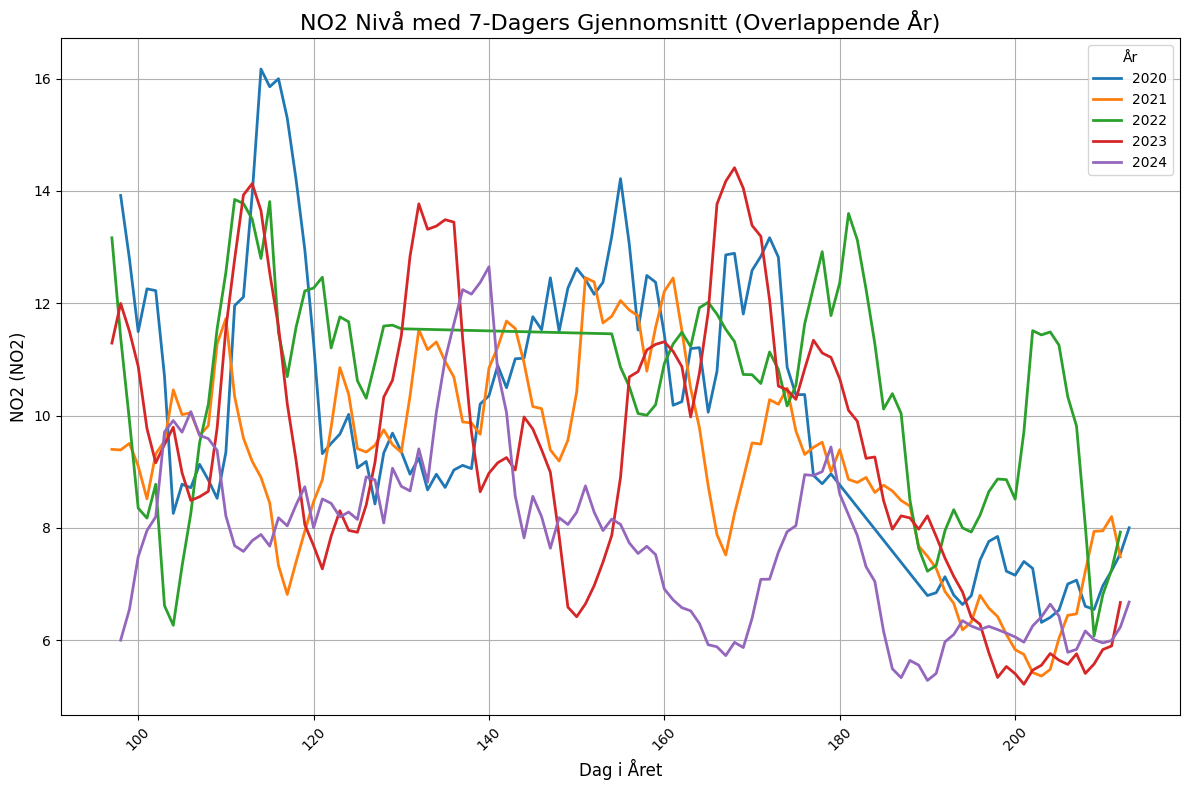

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Henter data fra fil
Luftdata = pd.read_json('../data/df1_fikset.json')

# Bytter til riktig datoformat
Luftdata["date"] = pd.to_datetime(Luftdata["date"])

# Få året
Luftdata["year"] = Luftdata["date"].dt.year

variable = "NO2"

# Gjennomsnittsvindu
avg_periode = 7

# Figur
plt.figure(figsize=(12, 8))

# Looper gjennom hvert år og lager gjennomsnitt
for year, group in Luftdata.groupby("year"):
    group = group.copy()
    group["day_of_year"] = group["date"].dt.day_of_year  # får datoene til å samsvare gjennom årene
    group[f"{variable}_avg_periode"] = group[variable].rolling(window=avg_periode).mean()
    
    # Plotter gjennomsnitt
    plt.plot(group["day_of_year"], group[f"{variable}_avg_periode"], label=f"{year}", linewidth=2)


plt.title(f"{variable} Nivå med {avg_periode}-Dagers Gjennomsnitt (Overlappende År)", fontsize=16)
plt.xlabel("Dag i Året", fontsize=12)
plt.ylabel(f"{variable} ({Luftdata[variable].name})", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title="År")


plt.tight_layout()
plt.show()

Her kan vi se at manglende data kan skape problemer for visualiseringen for enkelte år. Den grønne linjen har en periode der temperaturen er uendret, siden det ble fylt inn med renset data som brukte 1. grads interpolasjon. Avhengig av hvilken metode som blir brukt kan dette se ganske forskjellig ut. Likevel kan vi kanskje få noe informasjon ut av grafen. Det er litt ut som om konsentrasjon NO2 dypper litt fra dag 185 til rundt dag 220, og litt før det for året 2022. 

Vi kan prøve med et annet eksempel, som temperatur, som ikke vil ha en mer jevn endring over tid. Vi kan gjøre samme visualisering med årene over hverandre med trendlinje: 

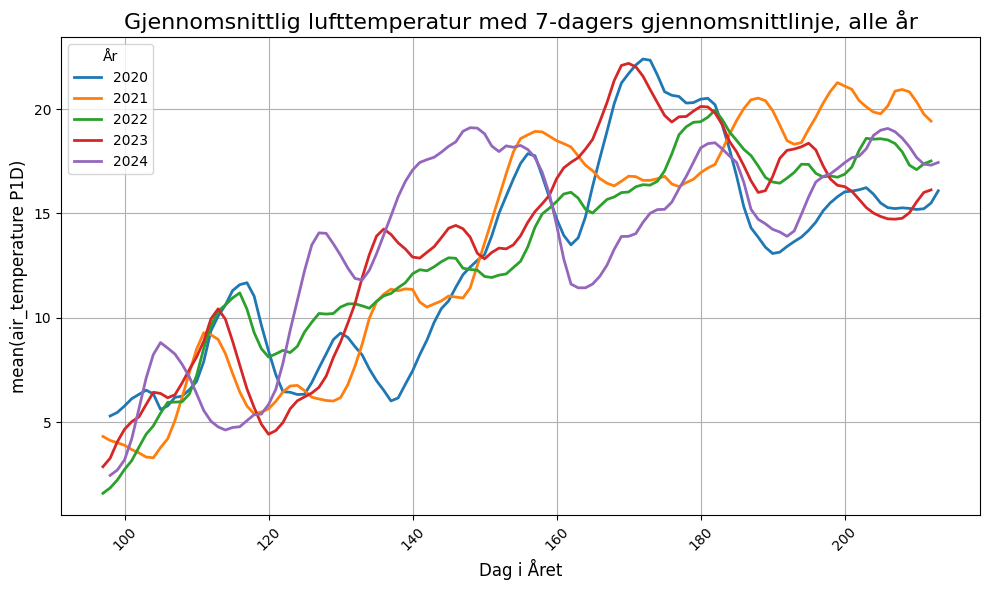

In [19]:
# Henter data fra "df2_data" som inneholder værdata
Værdata=pd.read_json('../data/df2_data.json')

Værdata["date"] = pd.to_datetime(Værdata["referenceTime"],unit='ms')

Værdata["year"] = Værdata["date"].dt.year

variable="mean(air_temperature P1D)"

avg_periode=7

plt.figure(figsize=(10, 6))

for year, group in Værdata.groupby("year"):
    group = group.copy()
    group["day_of_year"] = group["date"].dt.day_of_year  # får datoene til å samsvare gjennom årene
    group[f"{variable}_avg_periode"] = group[variable].rolling(window=avg_periode).mean()
    
    # Plotter gjennomsnitt
    plt.plot(group["day_of_year"], group[f"{variable}_avg_periode"], label=f"{year}", linewidth=2)


plt.title("Gjennomsnittlig lufttemperatur med 7-dagers gjennomsnittlinje, alle år", fontsize=16)
plt.xlabel("Dag i Året", fontsize=12)
plt.ylabel(variable, fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title="År")


plt.tight_layout()
plt.show()



Denne typen visualisering passet enda bedre til temperatur enn konsentrasjon NO2, og viser jevnlig endring av temperatur som er nokså likt år for år. 


Neste typen visualisering vi kan se på er scatterplots. Dette er en god ide for å se sammenheng mellom to datasett. Uansett om et datasett kan variere mye, vil scatterplot ikke se rotete ut, men kan heller vise sammenhengen. 

Vi kan også legge til en best fit linje for å vise om det er sterk eller svak sammenheng mellom dataene 

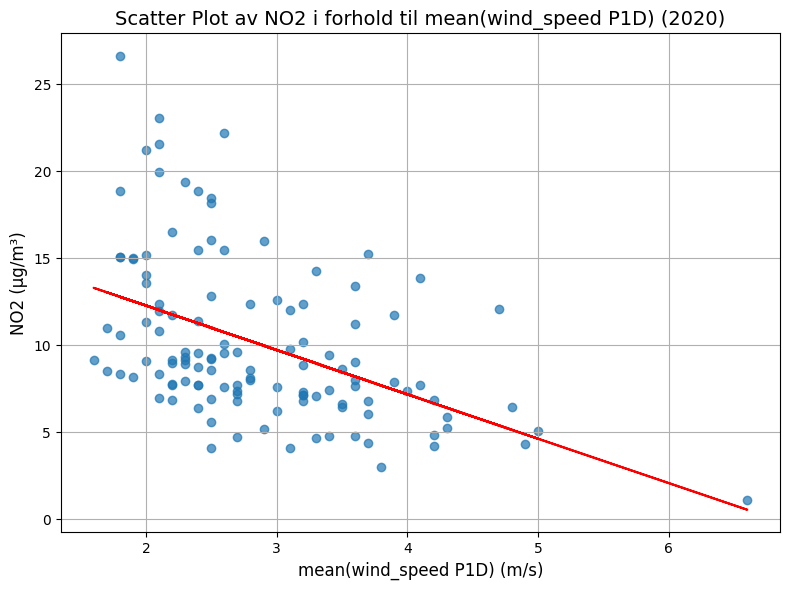

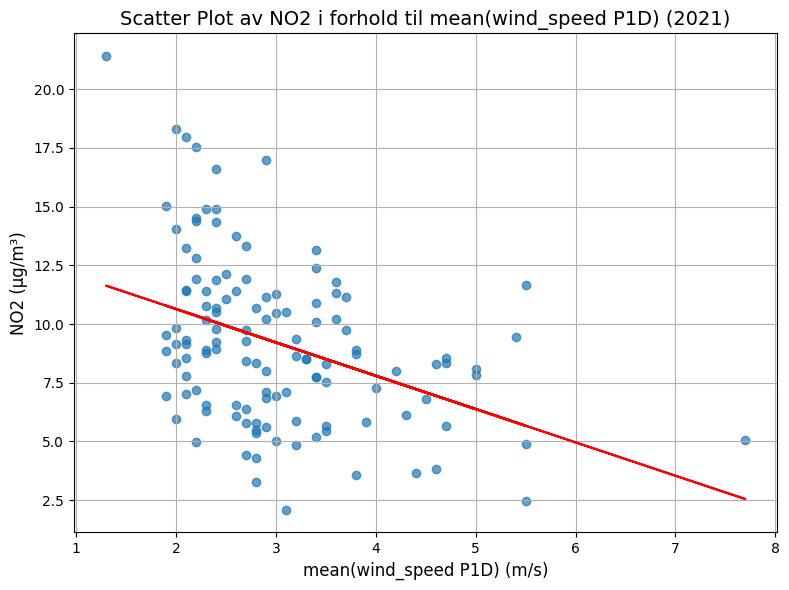

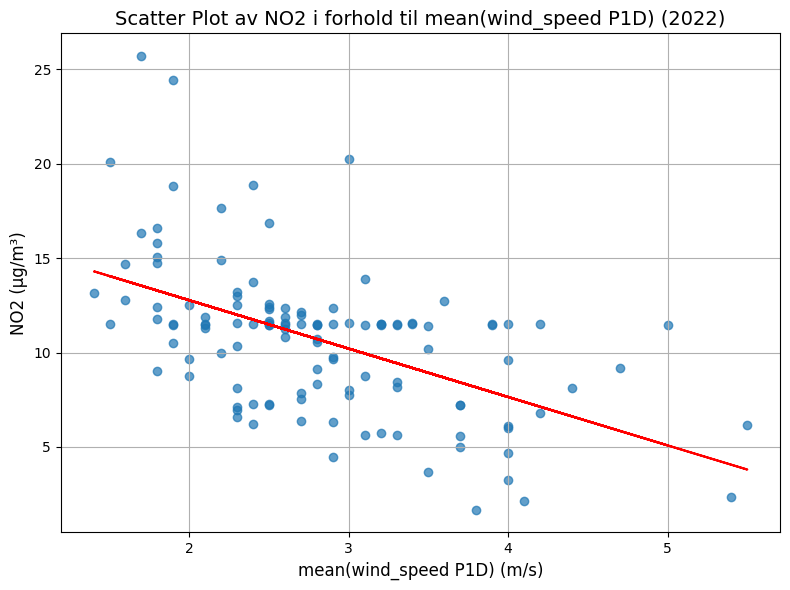

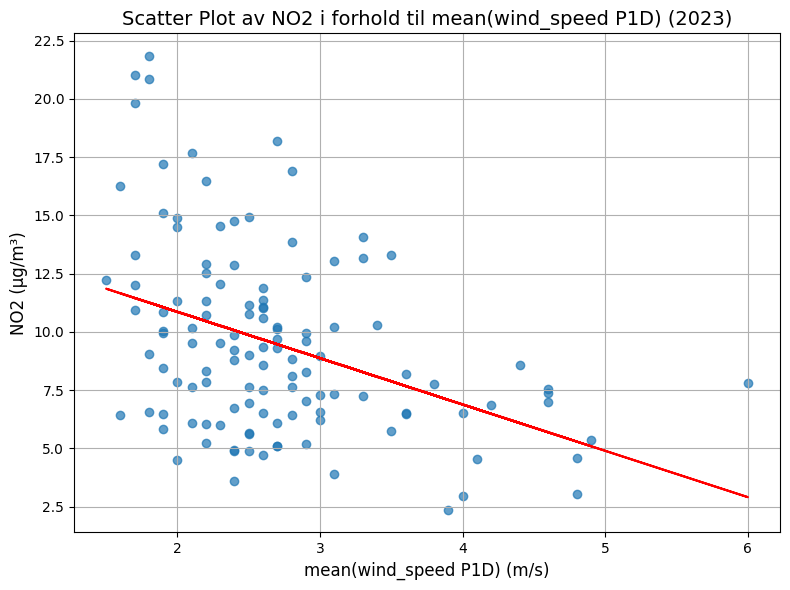

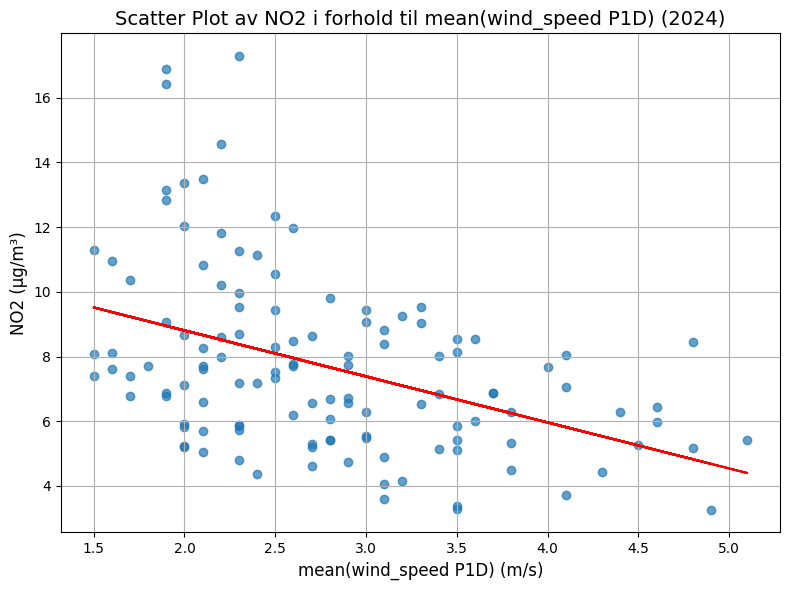

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Henter data
df1 = pd.read_json('../data/df1_fikset.json')
df2 = pd.read_json('../data/df2_data.json')

# Konverterer dato til riktig format
df1['date'] = pd.to_datetime(df1['date'], unit='ms')
df2['referenceTime'] = pd.to_datetime(df2['referenceTime'], unit='ms')

# Merger datasets
merged_df = pd.merge(df1, df2, left_on='date', right_on='referenceTime')

# Henter år for gruppering
merged_df['year'] = merged_df['date'].dt.year

# Variabler
x_variable = 'mean(wind_speed P1D)'  # Fra df2_data.json
y_variable = 'NO2'  # Fra df1_data.json

# Plotter
for year, group in merged_df.groupby('year'):
    plt.figure(figsize=(8, 6))
    plt.scatter(group[x_variable], group[y_variable], alpha=0.7)

    # Legger til best fit line 
    if not group[x_variable].isnull().any() and not group[y_variable].isnull().any():
        slope, intercept = np.polyfit(group[x_variable], group[y_variable], 1)
        best_fit_line = slope * group[x_variable] + intercept
        plt.plot(group[x_variable], best_fit_line, color='red', label='Best Fit Line')
    
    plt.title(f'Scatter Plot av {y_variable} i forhold til {x_variable} ({year})', fontsize=14)
    plt.xlabel(x_variable+" (m/s)", fontsize=12)
    plt.ylabel(y_variable+" (\u00b5g/m\u00b3)", fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Her kan vi se at alle årene har en merkbar negativ korrelasjon mellom mean(wind_speed P1D) og NO2 konsentrasjon. Dette vil si at jo sterkere vind det er på dagen, jo lavere gjennomsnittlig konsentrasjon NO2 blir.

I tillegg til å bruke matplotlib er det også mulig å bruke seaborn, som viser dataen mer tydelig og oversiktlig

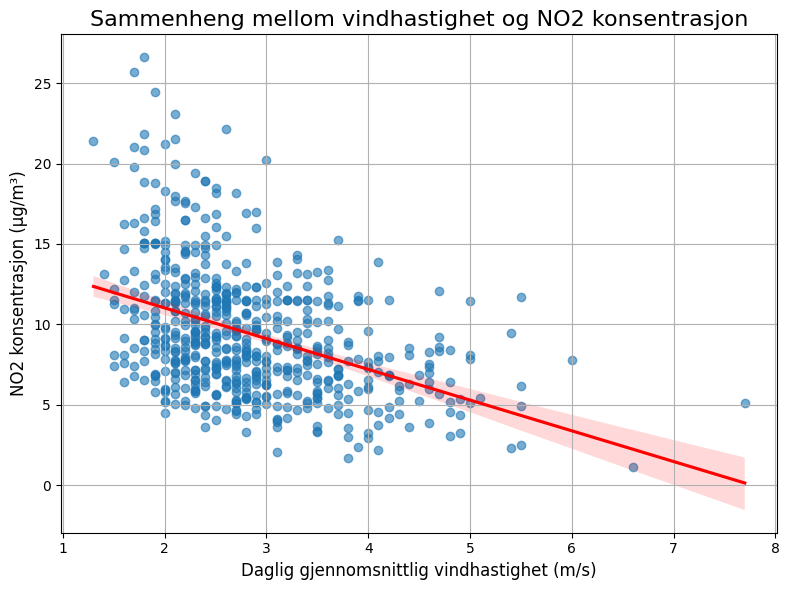

In [15]:
# Scatterplot med regresjonslinje
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.regplot(data=merged_df, x='mean(wind_speed P1D)', y='NO2', scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.title('Sammenheng mellom vindhastighet og NO2 konsentrasjon', fontsize=16)
plt.xlabel('Daglig gjennomsnittlig vindhastighet (m/s)', fontsize=12)
plt.ylabel('NO2 konsentrasjon (\u00b5g/m\u00b3)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()